# Install rdkit

using pypi or whatever install rdkit


In [ ]:
!pip install rdkit

## Ex 1. Read molecules from SMILES

SMILES (Simplified Molecular-Input Line-Entry System) is a popular method for specifying molecules with text string. The RDkit library provides utilities to read molecules from SMILES.


Paracetamol (Acetaminophen) is a commonly used medicine that can help treat pain and reduce a high temperature. It's given by the chemical formula $ C_8H_9N O_2$ and its SMILES is "CC(=O)NC1=CC=C(O)C=C1".


1. Create the paracetamol molecule from its SMILES using the rdkit.Chem.MolFromSmiles class.


2. Visualize its structure (it's sufficient to print the paracetamol molecule or to use rdkit.Chem.Draw.MolToImage())


3. Print out the number of atoms. Did you get 11 ? It should be 20 atoms ? Why ?



4. Print out the list of atoms.


5. Find the number of bonds.



In [ ]:
# 1. Create the paracetamol molecule from its SMILES.
from rdkit import Chem
smiles = "CC(=O)NC1=CC=C(O)C=C1"
paracetamol = Chem.MolFromSmiles(smiles)

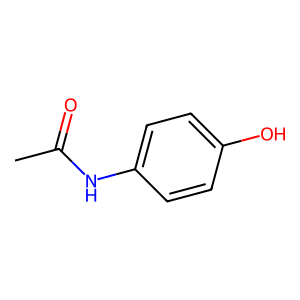

In [ ]:
# 2. Visualize its structure.
from rdkit.Chem import Draw
Draw.MolToImage(paracetamol)

In [ ]:
# 3. Print out the number of atoms.
print(f"{paracetamol.GetNumAtoms() = }")

paracetamol.GetNumAtoms() = 11


Hydrogen atoms do not contribute to this value.

In [ ]:
# 4. Print out the list of atoms.
for atom in paracetamol.GetAtoms():
    print(f"Atom {atom.GetIdx()}: {atom.GetSymbol()}")

Atom 0: C
Atom 1: C
Atom 2: O
Atom 3: N
Atom 4: C
Atom 5: C
Atom 6: C
Atom 7: C
Atom 8: O
Atom 9: C
Atom 10: C


In [ ]:
# 5. Find the number of bonds.
print(f"{paracetamol.GetNumBonds() = }")

paracetamol.GetNumBonds() = 11


## Ex 2 Read data from chemical file format

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at
the following url: https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf


1. Download this file and save it in a folder.


2. Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier"


3. With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector.

In [ ]:
# 1. Download this file and save it in a folder.
!curl -o "/content/DB00295.sdf" https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5451    0  5451    0     0  40741      0 --:--:-- --:--:-- --:--:-- 40984


In [ ]:
# 2. Read the morphine molecule from the file.
from rdkit.Chem import AllChem, SDMolSupplier
supplier = SDMolSupplier("/content/DB00295.sdf")
morphine = next(supplier)

In [ ]:
# 3. Compute its fingerprint as a bit vector.
fingerprint = AllChem.GetMorganFingerprintAsBitVect(morphine, 2)
print(fingerprint.ToBitString())

0000000000000000000000000000000000000000000000000000000000000000000100000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000001000000000000000000000000000000000000000000000000000000000000000010000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000001000000000010000000000000000000000000000000000000000000000000000000010000000000000010000000000100100000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000010000000010000100000000000000000000000000000000000000000000000000000000000

[11:11:49] DEPRECATION WARNING: please use MorganGenerator


## EX3. Fingerprints


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.



1. Compute the fingerprint of the paracetamol as bit vector by using the rdkit.AllChem.GetMorganFingerprintAsBitVectCompute Class. Convert it to a numpy vector. Known that Paracetamol's SMILES is ""CC(=O)OC1=CC=CC=C1C(O)=O". Choose the number of bits nBits= 1024. Find the elements that are nonzero of the vector.

2. Do the same thing for the aspirin. Aspirin's SMILES is "CC(=O)NC1=CC=C(O)C=C1".



3. Using rdkit.DataStructs.DiceSimilarity(), compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.

In [ ]:
import numpy as np

In [ ]:
# 1. Compute the fingerprint of the paracetamol as bit vector and find the elements that are nonzero of the vector.
paracetamol = Chem.MolFromSmiles("CC(=O)OC1=CC=CC=C1C(O)=O")
paracetamol_fingerprint = AllChem.GetMorganFingerprintAsBitVect(paracetamol, 2, nBits=1024)
print(f"{np.nonzero(paracetamol_fingerprint) = }")

np.nonzero(paracetamol_fingerprint) = (array([  11,   23,   33,   64,  175,  356,  386,  389,  423,  444,  456,
        592,  650,  695,  705,  726,  751,  807,  849,  893,  909,  946,
        967, 1017]),)


[11:11:49] DEPRECATION WARNING: please use MorganGenerator


In [ ]:
# 2. Do the same thing for the aspirin.
aspirin = Chem.MolFromSmiles("CC(=O)NC1=CC=C(O)C=C1")
aspirin_fingerprint = AllChem.GetMorganFingerprintAsBitVect(aspirin, 2, nBits=1024)
print(f"{np.nonzero(aspirin_fingerprint) = }")

np.nonzero(aspirin_fingerprint) = (array([  33,   53,  128,  191,  245,  289,  356,  530,  578,  650,  726,
        745,  754,  792,  807,  843,  849,  893, 1017]),)


[11:11:49] DEPRECATION WARNING: please use MorganGenerator


In [ ]:
# 3. Compute the DiceSimilarity between the fingerprints of the paracetamol and the aspirin.
from rdkit import DataStructs
dice_similarity = DataStructs.DiceSimilarity(paracetamol_fingerprint, aspirin_fingerprint)
print(f"{dice_similarity = }")

dice_similarity = 0.37209302325581395


## EX 4: Descriptors

Molecules are also described by a set of physiochemical descriptors. They should be the log partition coefficient, the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.
Using the rdkit.ML.Descriptors.MoleculeDescriptors.MolecularDescriptorCalculator class, compute the descriptor for paracetamol molecule from SMILES string. Note that SMILES string for paracetamol is "CC(=O)NC1=CC=C(O)C=C1"



In [ ]:
from rdkit.ML.Descriptors import MoleculeDescriptors
paracetamol = Chem.MolFromSmiles("CC(=O)NC1=CC=C(O)C=C1")
calculator = MoleculeDescriptors.MolecularDescriptorCalculator([descriptor[0] for descriptor in Chem.Descriptors._descList])
descriptors = calculator.CalcDescriptors(paracetamol)
print(descriptors)

(10.524468537414966, 10.524468537414966, 0.11510204081632636, -0.11510204081632636, 0.5950261967780849, 9.181818181818182, 151.165, 142.093, 151.063328528, 58, 0, 0.22074743631242583, -0.5079643157925783, 0.5079643157925783, 0.22074743631242583, 1.3636363636363635, 1.9090909090909092, 2.3636363636363638, 16.25468871437965, 10.280190859964755, 1.9280360590359866, -1.9945540738765895, 2.12524757916018, -2.04401131261029, 5.88095478459792, -0.11373578338266109, 1.9291266251851134, 2.7362980721056545, 253.29949758389105, 8.267584713501616, 6.164862962722325, 6.164862962722325, 5.1815405503520555, 3.2490981480278296, 3.2490981480278296, 2.228060242189872, 2.228060242189872, 1.1876733148984595, 1.1876733148984595, 0.7480265991539318, 0.7480265991539318, -1.5099999999999998, 285.51074052739676, 7.595374077976819, 3.0531381005525, 2.292303972882069, 64.66690538413799, 10.423315998847038, 5.749511833283905, 0.0, 5.907179729351506, 0.0, 0.0, 4.794537184071822, 0.0, 0.0, 0.0, 0.0, 24.265468273846

## Ex5: SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.

1. Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


2. Highlight the pattern "CCC" in these molecules.


3. Do the same thing ex 1 but for the pattern "C(=O)N".

In [ ]:
from IPython.display import display

smiles_list = [
  "CC(=O)OC1=CC=CC=C1C(O)=O",
  "CC(=O)NC1=CC=C(O)C=C1",
]

def highlight_pattern(pattern, smiles_list):
  pattern = Chem.MolFromSmarts(pattern)
  # Find molecules in the list named that contain the pattern.
  for smiles in smiles_list:
    mol = Chem.MolFromSmiles(smiles)
    if not mol.HasSubstructMatch(pattern):
      continue
    substruct_match = mol.GetSubstructMatch(pattern)
    # Highlight the pattern in these molecules.
    mol_highlight = Draw.MolToImage(mol, highlightAtoms=substruct_match)
    print(smiles)
    display(mol_highlight)

In [ ]:
highlight_pattern("CCC", smiles_list)

CC(=O)NC1=CC=C(O)C=C1


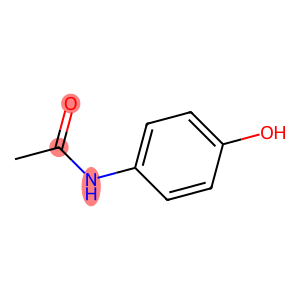

In [ ]:
highlight_pattern("C(=O)N", smiles_list)

## Ex6: Machine learning with RDkit - Predict solubility

In this exercise, we will use machine learning to predict solubility of molecules. For this purpose, we will borrow a dataset from rdkit that is originated from the Huuskonen dataset. We will try to predict Aqueous Solubility for molecules that is known as "logS".


This exercise is divided into 3 parts: Preparing a dataset, training a model and preparing dataset for prediction and applying a predictive model.



## EX6.I Preparing dataset

Preparing dataset requires a few steps:


1. Download file from the following link: https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf.


2. With the help of rdkit.Chem.SDMolSupplier, get list of molecules contained in this file. You should call this list as **molecule_list**. The option **removeHs=False** should be chosen.


3. Write a function named **calculate_descriptors(mol)** that allows us to calculate descriptors of a molecule. This function takes a Rdkit molecule as input and returns an array vector of descriptors.


4. Apply the function **caluclate_descriptors** to the list of molecules **molecule_list** and store the result in a dataframe named **df**. Look at few rows of **df** to see whether the descriptors are calculated.


5. For each molecule from this dataset, we can get the aqueous solubility (logS) via attribute **getProp('SOL')**. Create a list that contains the aqueous solubility of all molecules from the **molecule_list** list. You should call this list by **labels**. Remember to convert these values to float format.


6. Plot the histogram of the "labels" list to see the distribution of the solubility of molecules. Do you have some comments about the aqueous solubility of molecules ?



In [ ]:
# 1. Download file.
!curl -o "/content/solubility.train.sdf" https://raw.githubusercontent.com/rdkit/rdkit/master/Docs/Book/data/solubility.train.sdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1344k  100 1344k    0     0  2851k      0 --:--:-- --:--:-- --:--:-- 2847k


In [ ]:
# 2. Get list of molecules contained in this file.
supplier = SDMolSupplier("/content/solubility.train.sdf", removeHs=False)
molecule_list = list(supplier)

In [ ]:
# 3. Write a function that allows us to calculate descriptors of a molecule.
def calculate_descriptors(mol):
  calculator = MoleculeDescriptors.MolecularDescriptorCalculator([descriptor[0] for descriptor in Chem.Descriptors._descList])
  descriptors = calculator.CalcDescriptors(mol)
  return np.array(descriptors)

In [ ]:
# 4. Apply the function to the list of molecules and store the result in a dataframe.
import pandas as pd
df = pd.DataFrame(list(map(calculate_descriptors, molecule_list)), columns=[descriptor[0] for descriptor in Chem.Descriptors._descList])
df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.211806,2.211806,1.343750,1.343750,0.468786,8.400000,72.151,60.055,72.093900,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,1.500000,1.500000,1.500000,1.500000,0.408362,24.000000,70.135,60.055,70.078250,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.231806,2.231806,1.355000,1.355000,0.462954,9.000000,86.178,72.066,86.109550,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,2.253472,2.253472,0.898148,0.898148,0.483890,10.000000,86.178,72.066,86.109550,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.243056,2.243056,0.541667,0.541667,0.424482,12.000000,86.178,72.066,86.109550,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,13.185826,13.185826,0.003051,-1.627805,0.648763,43.093750,444.568,408.280,444.251189,176.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1021,12.042248,12.042248,0.066834,-1.044559,0.410290,47.696970,465.631,422.287,465.309038,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,13.125689,13.125689,0.037157,-2.328350,0.574043,37.357143,385.416,362.232,385.152537,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023,13.235654,13.235654,0.033093,-1.605971,0.619599,42.636364,460.611,420.291,460.282489,184.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 5. Create a list that contains the aqueous solubility of all molecules.
labels = [float(mol.GetProp("SOL")) for mol in molecule_list]

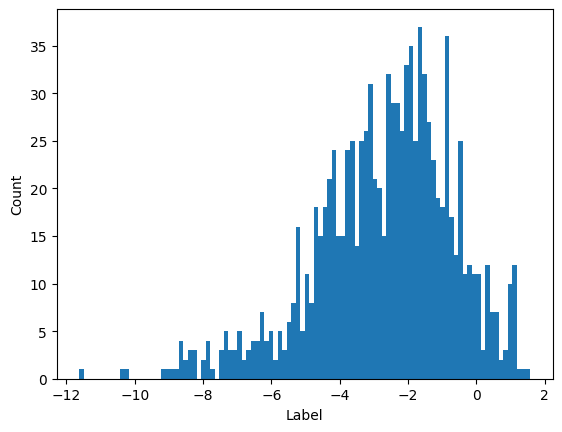

In [ ]:
# 6. Plot the histogram of the labels list to see the distribution of the solubility of molecules.
import matplotlib.pyplot as plt
plt.hist(labels, bins=100)
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

The aqueous solubility of molecules seems to be evenly distributed around `-2`.

## Ex6.II Feature Engineering and Training a model of regression.

Now, we have the **df** dataframe that contains the descriptors for molecules and the **labels** list that contains the solvant property of molecules.

1. Check the dataframe **df** to see whether it contains NaN values. How many row contained NaN values are there in the dataframe **df** ? Remove these rows from  **df** and **labels**.


2. Apply the MinMaxScaler to the dataframe **df** to normalize the data.


3. Construct and train a regression model.


4. Calculate the square root error for the dataset

In [ ]:
# 1. Check the dataframe to see whether it contains NaN values.
rows_with_nan = df.isna().any(axis=1)
print(f"Has NaN values? {rows_with_nan.sum() > 0}")

Has NaN values? True


In [ ]:
# Remove these rows from the dataframe and labels.
df = df[~rows_with_nan]
labels = [label for row, label in enumerate(labels) if not rows_with_nan[row]]

In [ ]:
df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2.211806,2.211806,1.343750,1.343750,0.468786,8.400000,72.151,60.055,72.093900,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,1.500000,1.500000,1.500000,1.500000,0.408362,24.000000,70.135,60.055,70.078250,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.231806,2.231806,1.355000,1.355000,0.462954,9.000000,86.178,72.066,86.109550,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
3,2.253472,2.253472,0.898148,0.898148,0.483890,10.000000,86.178,72.066,86.109550,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.243056,2.243056,0.541667,0.541667,0.424482,12.000000,86.178,72.066,86.109550,38.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,13.185826,13.185826,0.003051,-1.627805,0.648763,43.093750,444.568,408.280,444.251189,176.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1021,12.042248,12.042248,0.066834,-1.044559,0.410290,47.696970,465.631,422.287,465.309038,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1022,13.125689,13.125689,0.037157,-2.328350,0.574043,37.357143,385.416,362.232,385.152537,148.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1023,13.235654,13.235654,0.033093,-1.605971,0.619599,42.636364,460.611,420.291,460.282489,184.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 2. Apply the MinMaxScaler to normalize the data.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df.values)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

In [ ]:
# 3. Construct and train a regression model.
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 4. Calculate the square root error for the dataset.
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{rmse = }")

rmse = 0.6699194532483042


## Ex6.III Prepare data for test  and test model


1. Download file from : https://github.com/rdkit/rdkit/blob/master/Docs/Book/data/solubility.test.sdf

2. Read molecules from this file and store them in a list named **list_molecule_test**.


3. Take a molecule from the **list_molecule_test** and then calculate its descriptions thank to the **calculate_descriptors(mol)** function that you've coded above.


4. Apply **minmaxscaler** to these descriptors. Note that **minmaxscaler**  is one that you've created at Ex6.II.


5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule. Compare to the real logS value of the molecule.

6. (Optional) Calculate the mean square root error of the model for this dataset.



Note: If there exists problem of reading the file solubility.test.sdf as
"RDKit ERROR: [09:28:36] ERROR: moving to the beginning of the next molecule
RDKit ERROR: [09:32:48] ERROR: Counts line too short: '' on line4"
so, go to the url, click "raw" and save this file by hand. The error will be gone away


In [ ]:
# 1. Download file.
!curl -o "/content/solubility.test.sdf" https://raw.githubusercontent.com/rdkit/rdkit/refs/heads/master/Docs/Book/data/solubility.test.sdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  239k  100  239k    0     0  1306k      0 --:--:-- --:--:-- --:--:-- 1311k


In [ ]:
# 2. Read molecules from this file and store them in a list.
supplier = SDMolSupplier("/content/solubility.test.sdf", removeHs=False)
list_molecule_test = list(supplier)

In [ ]:
# 3. Take a molecule from the list and calculate its descriptions.
mol = list_molecule_test[0]
descriptors = calculate_descriptors(mol)

In [ ]:
# 4. Apply minmaxscaler to these descriptors.
descriptors_scaled = scaler.transform(descriptors.reshape(1, -1))

In [ ]:
# 5. Use the model that you've trained to predict the aqueous solubility (logS) of the molecule.
predicted_logS = model.predict(descriptors_scaled)[0]
real_logS = float(mol.GetProp("SOL"))
print(f"Predicted logS: {predicted_logS}")
print(f"Real logS: {real_logS}")

Predicted logS: -3.363676124903037
Real logS: -3.68


In [ ]:
# 6. Calculate the mean square root error.
y_pred = []
y_test = []
for mol in list_molecule_test:
    descriptors = calculate_descriptors(mol)
    descriptors_scaled = scaler.transform(descriptors.reshape(1, -1))
    y_pred.append(model.predict(descriptors_scaled)[0])
    y_test.append(float(mol.GetProp("SOL")))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"{rmse_test = }")

rmse_test = 1.1600878421233431
